In [ ]:
# Building a CNN Image Classifier Assignment
# DSC 550
# Week 11
# Data Mining Assignment Week 11
# David Berberena
# 5/26/2024

# Program Start

## 1. Load the MNIST dataset.

In [1]:
# After doing research on the MNIST dataset, I have found that the dataset consists of 70,000 images depicting handwritten 
# digits between 0 and 9 split into a 60,000 image training set and a 10,000 image test set. Each digit has been 
# preprocessed to fit a 28x28 pixel image, with each pixel ranging in value from 0 to 255. This information comes straight 
# from the Keras 3 API web page cited here: https://keras.io/api/datasets/mnist/

# To access the MNIST dataset, I need to import TensorFlow to access it from the Keras module.

import tensorflow as tf
from tensorflow.keras.datasets import mnist

# To load the dataset, the Keras 3 API web page shows that this dataset can be loaded through the load_data() function. I 
# will assign the dataset values to the tuples of x_images, x_digits and y_images, y_digits as the dataset returns the 
# images and their corresponding digits as the training and test sets.

(x_images, x_digits), (y_images, y_digits) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


## 2. Display the first five images in the training data set. Compare these to the first five training labels.

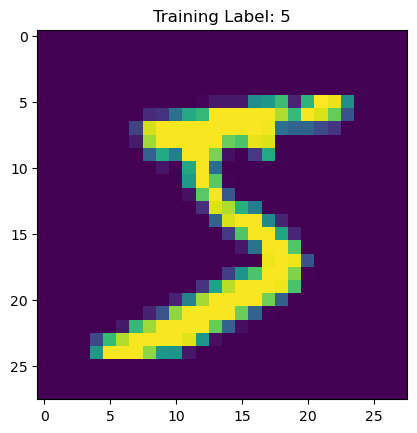

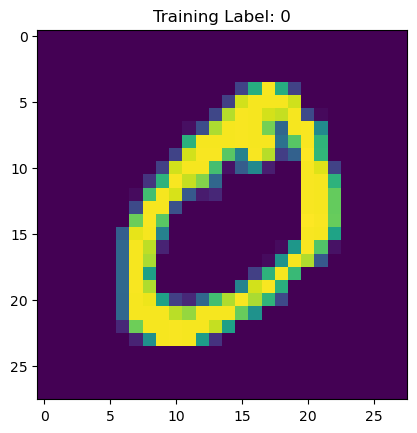

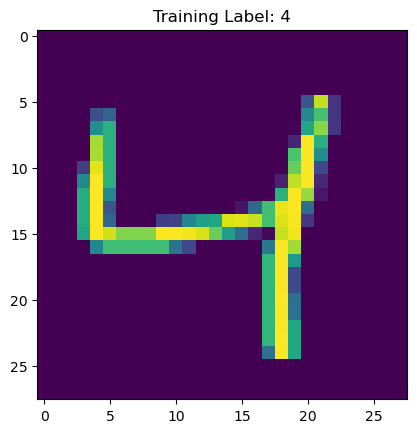

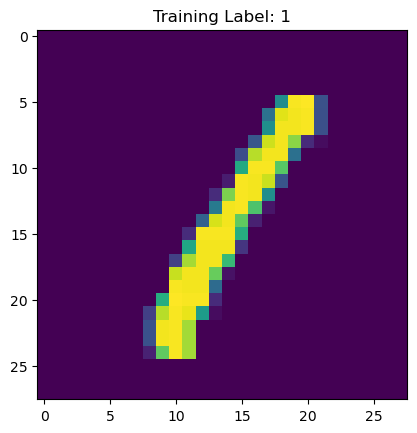

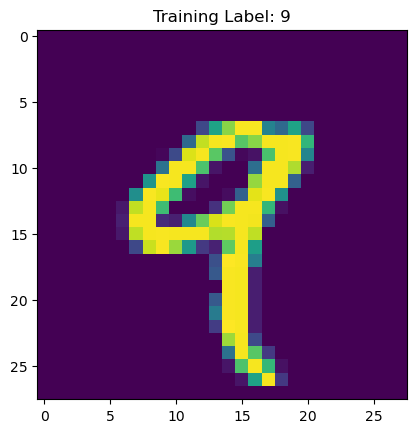

In [4]:
# To output the images within the MNIST dataset, I will be importing Matplotlib. It contains the imshow() function, which is
# designed to print images. I have created a for loop to accomplish printing the first five images while placing the 
# corresponding training label with the image as the image title to compare the handwritten digit image to the digit label. 

import matplotlib.pyplot as plt

for image in range(5):
    plt.imshow(x_images[image])
    plt.title(f'Training Label: {x_digits[image]}')
    plt.show()

## 3. Build and train a Keras CNN classifier on the MNIST training set.

In [11]:
# To craft the CNN classifier, the data needs to be normalized first. To do this, the training and test image sets need to 
# reshaped so that the model can receive the data in its intended input form: as one feature containing 60,000 observations 
# with those two-dimnsional observations measuring 28x28 pixels. To normalize the observations even further, I need to have 
# the image weights exist within the scale of 0 to 1, so I have divided the entire training set by 255 as each pixel is 
# weighted each 0 and 255. I did research to figure this out and found this source to aid in my coding here: 
# https://www.kaggle.com/code/amyjang/tensorflow-mnist-cnn-tutorial

train_images = x_images.reshape((60000, 28, 28, 1)).astype('float') / 255
test_images = y_images.reshape((10000, 28, 28, 1)).astype('float') / 255

# Building the CNN classifier required me to study section 22.1 in the textbook very carefully since I am using TensorFlow 
# and not PyTorch as the book does. I tried following the flow of the CNN created in PyTorch and have reflected that flow in
# my current CNN classifier in TensorFlow. The first convolutional layer having 32 kernels and the second having 64 kernels
# mirrors the textbook along with the kernel size as outlined in the lines of code using the Con2D() function with the relu 
# activation argument. I asserted the 28x28x1 image size as the input_shape argument allows so the model knows the size of 
# each image it will classify and eventually reduce. The MaxPool2D() and Dropout() functions mimic the PyTorch model as well
# with the same arguments and roughly the same placement within the model's creation of layers. The Flatten() function works
# to make the previous two-dimensional layer one-dimensional for the digit classifiers. The final two Dense() function 
# layers allows for the nodes to dwindle down to one of the ten digit classifiers available for the model to classify the 
# image as. The softmax argument allows for the probability distribution of each digit being the correct classifier.

cnn_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# To compile the model using the compile() function, again I needed to reference the book's PyTorch model to translate 
# PyTorch compatible code to Keras compatible code. As Adam is the optimizer in the book's model, so it is here. As I am 
# looking for accuracy down the road, I am specifying it using the metrics argument. 

cnn_model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

# To fit the model, I am calling the training set as a whole along with the PyTorch model's batch size specified here. To 
# have the model fit the training set multiple times for increased accuracy, I have set the epochs argument to 5.

cnn_model.fit(x_images, x_digits, epochs = 5, batch_size = 64)

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 18s 17ms/step - accuracy: 0.8511 - loss: 2.0500
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 17s 18ms/step - accuracy: 0.9791 - loss: 0.0719
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 16s 17ms/step - accuracy: 0.9849 - loss: 0.0474
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 16s 17ms/step - accuracy: 0.9882 - loss: 0.0365
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 16s 17ms/step - accuracy: 0.9897 - loss: 0.0343


## 4. Report the test accuracy of your model.

In [14]:
# As we already see the training set accuracy in the previous output, this is a simple matter of evaluating the model in the
# background for the test set and printing the accuracy.

cnn_loss, cnn_accuracy = cnn_model.evaluate(y_images, y_digits)
print('Test accuracy for the CNN model is:', cnn_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9790 - loss: 0.0738
Test accuracy for the CNN model is: 0.9836999773979187


## 5. Display a confusion matrix on the test set classifications.

In [15]:
# To create the confusion matrix, first I need to import the NumPy library along with the confusion_matrix() function from 
# Sci-kitlearn's metrics module. 

import numpy as np
from sklearn.metrics import confusion_matrix

# The model predictions need to be generated with the predict() and np.argmax() functions with the axis argument set to 1 so
# the predictions capture the test labels assigned to the test images.

cnn_predictions = np.argmax(cnn_model.predict(y_images), axis=1)

# The confusion matrix can now be created and printed using the confusion_matrix() function using the test digit labela and
# the test predictions.

cnn_confusion_matrix = confusion_matrix(y_digits, cnn_predictions)
print("Confusion Matrix for the CNN Classifier")
print(cnn_confusion_matrix)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Confusion Matrix for the CNN Classifier
[[ 958    1    5    0    3    0    2    3    2    6]
 [   0 1131    2    0    0    0    0    2    0    0]
 [   0    3 1017    3    0    0    0    7    2    0]
 [   0    1    1  998    0    3    0    6    1    0]
 [   0    1    4    0  942    0    4    5    5   21]
 [   0    0    0    6    0  882    1    1    2    0]
 [   2    5    0    0    1    4  937    0    9    0]
 [   0    3    2    2    0    0    0 1018    0    3]
 [   2    1    3    4    0    0    0    2  960    2]
 [   0    4    0    1    2    5    1    1    1  994]]


## 6. Summarize your results.

The model did well in classifying the images into their correct digit labels as shown by the accuracy meteic of 98.37%. Looking at each pass through of the training set, each increasing epoch yielded a higher accuracy rating than the last, meaning that the model learned with each run through the data. Glancing at the confusion matrix, the model had the most trouble with identifying the digits 7, 8, and 9 correctly. The number 9 looks to be misidentified as the number 4 twenty-one times, the most false positives of the matrix. The numbers 7 and 8 were misidentified as multiple numbers, hence why they seemed to be an issue. Overall, the model would be considered a success given its high accuracy in image recognition.